In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageOps

mnist = tf.keras.datasets.mnist # Taking a dataset that is already preinstalled

# x_train holds all the data, y_train holds all teh labels of the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scaling the data, so it improves the accuracy of the machine learning model
# Talk about the test data set
print(y_train)

11490434/11490434 [==============================] - 1s 0us/step
[5 0 4 ... 5 6 8]


In [ ]:
example_array = np.array([[[1,2,3,4], [5,6,7,8]]])
print(example_array)
# Checking number of elements in each dimensions
print(f"The shape of the array is: {example_array.shape}")
print(f"The array has {example_array.ndim} dimensions")

In [4]:
print(x_train.shape)
x_test.shape

(60000, 28, 28)


(10000, 28, 28)

In [5]:
print(y_train.shape)
y_test.shape

(60000,)


(10000,)

In [6]:
print(y_test)
y_test.shape

[7 2 1 ... 4 5 6]


(10000,)

In [7]:
first_pic = x_train[0]
print(first_pic)
first_pic.shape

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

(28, 28)

In [10]:
print(first_pic.min())
first_pic.max()

0.0


1.0

The image at the 0th index is: 


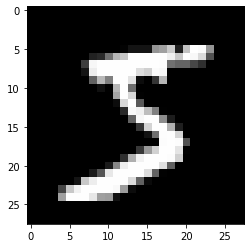

In [13]:
image_num = 0

print(f"The image at the {image_num}th index is: ")
plt.imshow(x_train[image_num], cmap="Greys_r")

In [14]:
zero = 0
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
seven = 0
eight = 0
nine = 0

for i in y_train:
    if i == 0:
        zero += 1
    elif i == 1:
        one += 1
    elif i == 2:
        two += 1
    elif i == 3:
        three += 1
    elif i == 4:
        four += 1
    elif i == 5:
        five += 1
    elif i == 6:
        six += 1
    elif i == 7:
        seven += 1
    elif i == 8:
        eight += 1
    elif i == 9:
        nine += 1

print(np.unique(y_train)) # Can see that all numbers from 0 to 9 is included
print(one, two, three, four, five, six, seven, eight, nine)


from collections import Counter
Counter(y_train)

[0 1 2 3 4 5 6 7 8 9]
6742 5958 6131 5842 5421 5918 6265 5851 5949


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [ ]:
# SKIP THIS
import random

random_list = [random.uniform(0,1) for i in range(784)]
random_array = np.array(random_list)

print(f"{random_array} \nBefore Reshape: {random_array.shape}")

random_array = random_array.reshape((28,28))
print(f"After Reshaping: {random_array.shape}")
plt.imshow(random_array, cmap='Greys_r')

# Building Model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Here is the model
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(units = 128, activation="sigmoid"),
                    Dense(units = 128, activation="sigmoid"),
                    Dense(10, activation = "sigmoid")
]) # talk about the model.summary details



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# More complicated one with more neurons and an extra layer

# model = Sequential([
#                     Flatten(input_shape=(28, 28)), # fully conv if not flatten, not using cnn, so no way to put all data into dense layer
#                     Dense(units = 128, activation="relu"),
#                     Dense(units = 128, activation="relu"),
#                     Dense(units = 128, activation="relu"),
#                     Dense(20, activation = "softmax")
# ])

In [19]:
model.compile(optimizer='adam', # Optimizes the program, such by what amount does the weights & biases change based on the negative gradients
              loss='sparse_categorical_crossentropy', # Our cost function, where we are using something called cross-entropy
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/30
118/118 [==============================] - 1s 7ms/step - loss: 1.3422 - accuracy: 0.6994 - val_loss: 0.5949 - val_accuracy: 0.8752
Epoch 2/30
118/118 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8923 - val_loss: 0.3382 - val_accuracy: 0.9113
Epoch 3/30
118/118 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.9152 - val_loss: 0.2708 - val_accuracy: 0.9241
Epoch 4/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2585 - accuracy: 0.9267 - val_loss: 0.2361 - val_accuracy: 0.9316
Epoch 5/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9352 - val_loss: 0.2103 - val_accuracy: 0.9381
Epoch 6/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9418 - val_loss: 0.1894 - val_accuracy: 0.9434
Epoch 7/30
118/118 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9480 - val_loss: 0.1720 - val_accuracy: 0.9497
Epoch 

 # Building Another Type of Model

In [ ]:
# Already ran at the very beginning, included it here to separate second model from first

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scaling the data, so it improves the accuracy of the machine learning model
x_train, x_test = x_train / 255.0, x_test / 255.0

# x_train_flattened = x_train.reshape(len(x_train), 28*28)
# x_test_flattened = x_test.reshape(len(x_test), 28*28)

print(x_test[0].shape)

(28, 28)
<class 'numpy.ndarray'>


In [ ]:
a = np.array([1,2])
print(a.shape)
print(np.expand_dims(a, 1))
print(np.expand_dims(a, 1).shape)

(2,)
[[1]
 [2]]
(2, 1)


In [ ]:
# model = Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape = (28, 28, 1)), # dont need epand dimms after removing the 1
#     MaxPooling2D(pool_size = (2, 2)),
#     Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'),
#     MaxPooling2D(pool_size = (2, 2)),
#     Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation='relu'),
#     Flatten(),
#     Dropout(0.2),
#     Dense(784, activation='relu'),
#     Dense(400, activation='relu'),
#     Dense(10, activation='sigmoid')
# ])
#
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#
# model.summary()
#
# history = model.fit(np.expand_dims(x_train, 3), y_train, epochs=30, batch_size=512, validation_data=(np.expand_dims(x_test, 3), y_test))

# Plotting the data that gathered while training

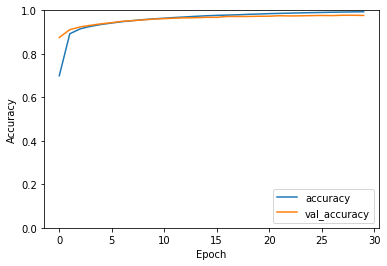

In [20]:
# Plotting

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# 💀💀💀💀💀💀💀💀💀

# Save and loading the model

In [6]:
model.save("MNIST.h5")

In [7]:
model = tf.keras.models.load_model('MNIST.h5')

#Prediction

In [20]:
# Evaluating the accuracy on the "test" dataset
model.evaluate(np.expand_dims(x_test, 3), y_test)
print()

313/313 [==============================] - 1s 3ms/step - loss: 0.2175 - accuracy: 0.9375



313/313 [==============================] - 1s 1ms/step
Prediction for '0': 0.02379000000655651
Prediction for '1': 0.8513000011444092
Prediction for '2': 0.1888200044631958
Prediction for '3': 0.8080999851226807
Prediction for '4': 0.020190000534057617
Prediction for '5': 0.012029999867081642
Prediction for '6': 0.005249999929219484
Prediction for '7': 0.9987599849700928
Prediction for '8': 0.2546899914741516
Prediction for '9': 0.5407800078392029
 -------------------------------------------------------- 
The model predicts 7, with a 99.87633228302002% certainty.


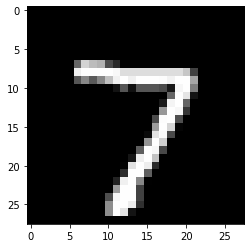

In [8]:
# Basically runs the entire test set through the model
y_predicted = model.predict(np.expand_dims(x_test, 3))

# Prints the probability of each number
for i in range(len(y_predicted[0])):
    print(f"Prediction for '{i}': {round(y_predicted[0][i], 5)}")
 

print(" -------------------------------------------------------- ")

print(f"The model predicts {np.argmax(y_predicted[0])}, with a {y_predicted[0].max() * 100}% certainty.")

plt.imshow(x_test[0], cmap="Greys_r")

# Try It Yourself

In [1]:
!git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git colab_draw

fatal: destination path 'colab_draw' already exists and is not an empty directory.


In [4]:
%run /content/colab_draw/draw.py

draw(filename = "/content/number.png", w=400, h=400, line_width=20)

ModuleNotFoundError: No module named 'google.colab'

NameError: name 'draw' is not defined

(1, 28, 28, 1)
1/1 [==============================] - 0s 17ms/step
[8.4439246e-04 9.6500866e-02 2.0295521e-04 2.7250469e-01 9.3805957e-01
 7.6651484e-01 3.4584338e-03 6.6015685e-01 7.2488356e-03 9.7913444e-01]
The model predicts 9, with a 97.91344404220581% certainty rate


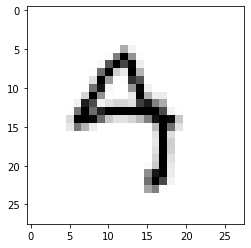

In [38]:
from PIL import Image, ImageOps

img = Image.open("/content/number.png")

# Removes the alpha channel, because it wouldn't work
def remove_transparency(img, bg_colour=(255, 255, 255)):
    if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
        alpha = img.convert('RGBA').split()[-1]
        bg = Image.new("RGBA", img.size, bg_colour + (255,))
        bg.paste(img, mask=alpha)
        return bg
    else:
        return img

def predict(img):
    img = ImageOps.invert(img) # invert image from white to black to black to white
    img = img.resize((28,28))
    img_array = np.array(img) / 255 # Recall, we need to normalize to get best results
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=3)
    print(img_array.shape) # (1, 28, 28, 1) (batch, width, height, rgb)
    y_pred = model.predict(img_array)
    return y_pred

remove_transparency(img=Image.open("number.png")).save("number.png")
img = Image.open("number.png")
img = img.convert("L") # Makes the image black and white

image = plt.imread("number.png")
plt.imshow(image)
y_pred = predict(img)

print(*y_pred)
print(f"The model predicts {np.argmax(y_pred)}, with a {y_pred.max() * 100}% certainty rate")

plt.imshow(img, cmap="Greys_r")
plt.imshow(img.resize((28, 28)), cmap="Greys_r")

# y_predicted = model.predict(np.expand_dims(img, 3))
# print(y_predicted[0])